In [1]:
from adversarial.attacks import attack
from adversarial.utils import dataloader
from adversarial.models import TargetModel

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train, y_train, X_test, y_test = dataloader.load_data("data")

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12894, 160, 160, 3) (12894,)
(500, 160, 160, 3) (500,)


In [4]:
epsilons = [0.01, 0.03, 0.1]
N = 5

In [5]:
target_model = TargetModel()
target_model.load_custom_weights("model/model_20200507_9_1.00_0.0088")

In [6]:
X_train_sample = X_train[np.random.randint(0, X_train.shape[0], size=N)]
y_train_sample = y_train[np.random.randint(0, X_train.shape[0], size=N)]

In [7]:
results = attack(target_model, X_train_sample, y_train_sample, epsilons)

In [8]:
results.keys()

dict_keys(['LinfDeepFool', 'L2DeepFool', 'FGSM', 'PGD', 'LinfPGD', 'L2PGD'])

LinfDeepFool
epsilon: 0.01


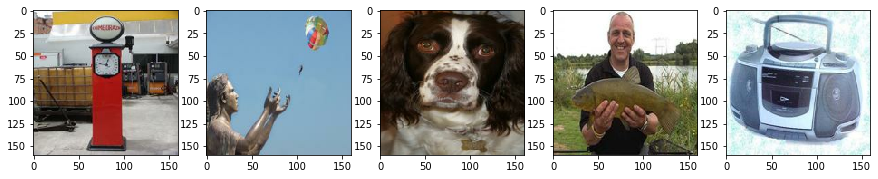

epsilon: 0.03


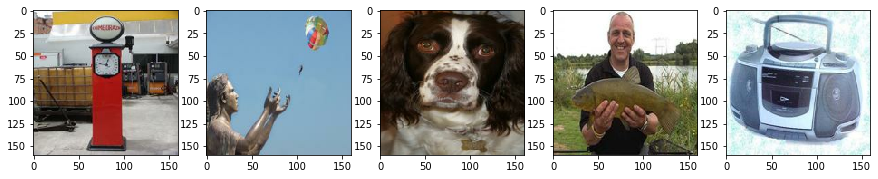

epsilon: 0.1


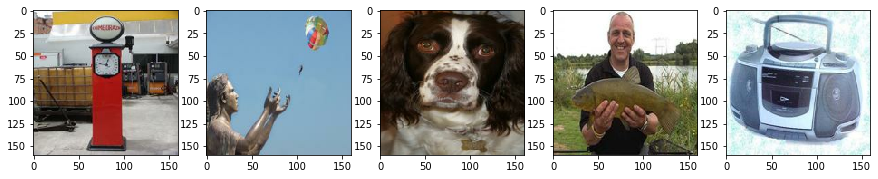

L2DeepFool
epsilon: 0.01


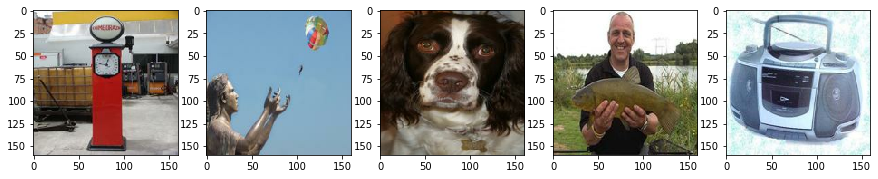

epsilon: 0.03


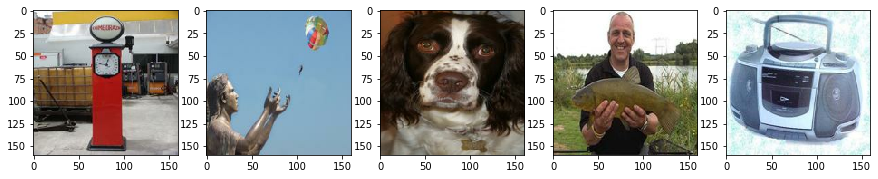

epsilon: 0.1


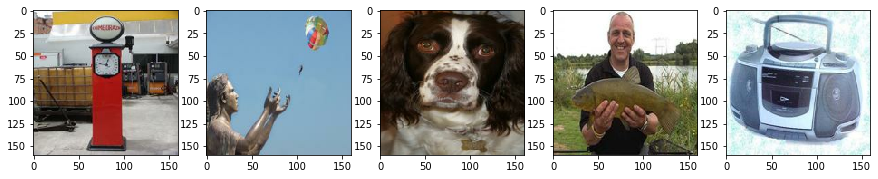

FGSM
epsilon: 0.01


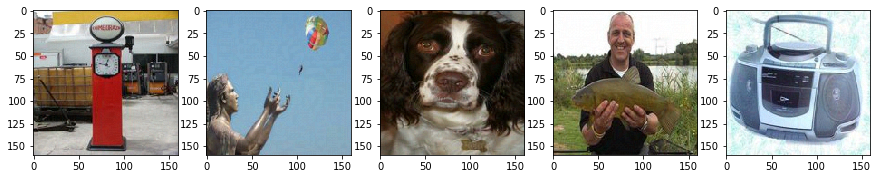

epsilon: 0.03


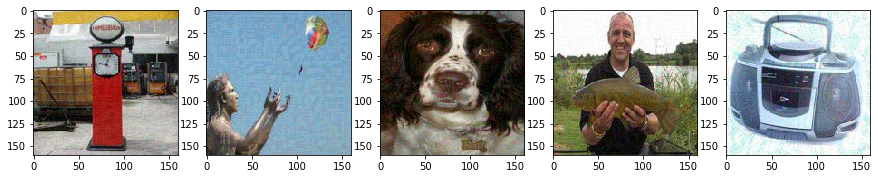

epsilon: 0.1


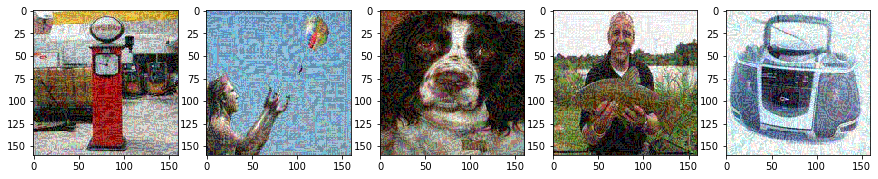

PGD
epsilon: 0.01


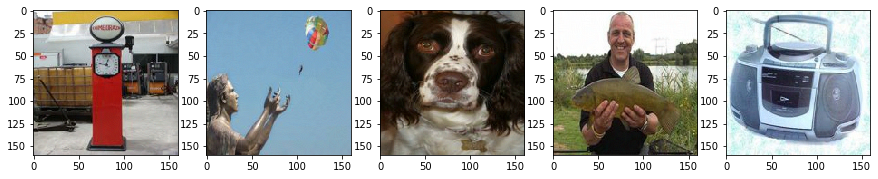

epsilon: 0.03


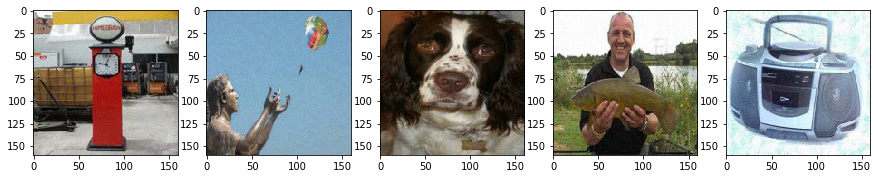

epsilon: 0.1


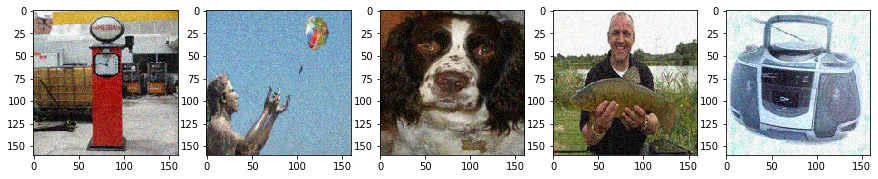

LinfPGD
epsilon: 0.01


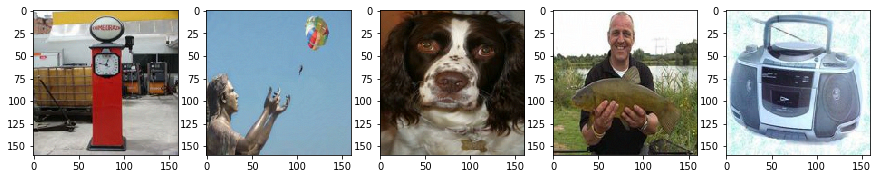

epsilon: 0.03


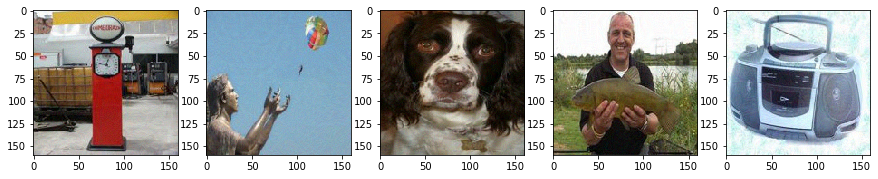

epsilon: 0.1


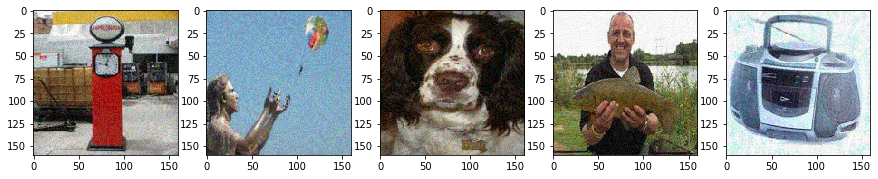

L2PGD
epsilon: 0.01


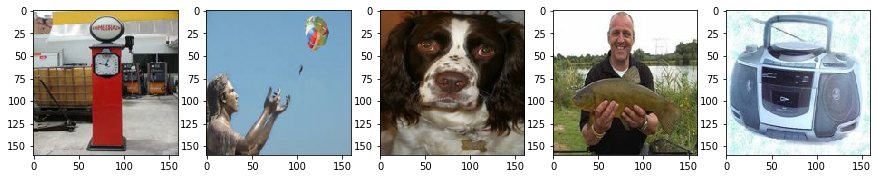

epsilon: 0.03


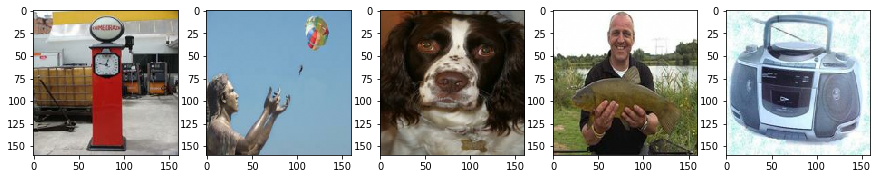

epsilon: 0.1


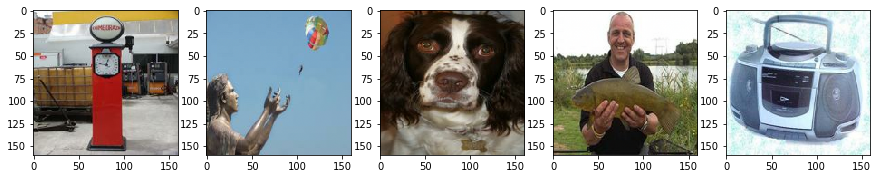

In [9]:
for k in results.keys():
    print(k)
    v = results[k]
    
    for i in range(len(epsilons)):
        print(f"epsilon: {epsilons[i]}")
        
        plt.figure(figsize=(15, 3))
        
        for j in range(N):
            plt.subplot(1, N, j+1)
            plt.imshow(v[1][i][j].numpy())
            
        plt.show()